In [1]:
import numpy as np
import timeit
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from time import time

# 1. Calculate the implied volatility

## (1) 歐式選擇權

### Black - Scholes model with Newton's method : European option - call

16500.0 implied vol =  0.22802831818788383
16600.0 implied vol =  0.26742099607493963
16700.0 implied vol =  0.24228942948923288
16800.0 implied vol =  0.21699831194286986
16900.0 implied vol =  0.19148625113587472
17000.0 implied vol =  0.16566854463202021
17050.0 implied vol =  0.1526086825751558
17100.0 implied vol =  0.1567084171670059
17150.0 implied vol =  0.152368933941979
17200.0 implied vol =  0.1455753245321933
17250.0 implied vol =  0.141377282222436
17300.0 implied vol =  0.1400141681269024
17350.0 implied vol =  0.13800647457398607
17400.0 implied vol =  0.13041464622713633
17450.0 implied vol =  0.12762370298614328
17500.0 implied vol =  0.12533529493247123
17550.0 implied vol =  0.1243211759783527
17600.0 implied vol =  0.12169256593888454
17650.0 implied vol =  0.12086890550204413
17700.0 implied vol =  0.11860167364136781
17750.0 implied vol =  0.11801527153315476
17800.0 implied vol =  0.11520935153577942
17850.0 implied vol =  0.11469437610654279
17900.0 implied vol 

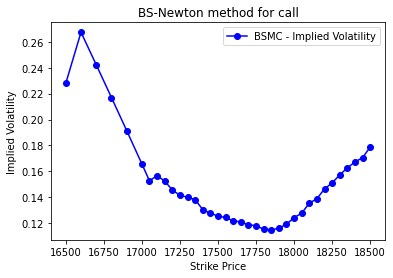

In [35]:
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Call"]
market_data
strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i,1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i,4])  # 取結算價 => market price
    

def option_price(volatility, S, K, T, r, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    d2 = d1 - volatility * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price


def price_difference(volatility, market_price, S, K, T, r, option_type='call'):
    model_price = option_price(volatility, S, K, T, r, option_type)
    difference = model_price - market_price
    return difference

# 牛頓法求解隱含波動度
def implied_volatility(market_price, S, K, T, r, option_type='call', tol=1e-6, max_iter=100):
    
    # 初始起始值v0
    volatility = np.sqrt(abs(np.log(S / (K * np.exp(-r * T)))) * 2 / T)

    # 牛頓法迭代
    for i in range(max_iter):
        difference = price_difference(volatility, market_price, S, K, T, r, option_type)
        vega = option_vega(volatility, S, K, T, r)
        
        # 牛頓法疊代 vn+1 = vn- ( f(vn)-w ) / f'(vn)
        volatility = volatility - difference / vega
        
        # 收斂條件
        if abs(difference) < tol:
            break

    return volatility

# 函數計算選擇權的vega => f'(v)
def option_vega(volatility, S, K, T, r):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return vega

# 測試
underlying_price = 17519.14  # 基礎資產價格
time_to_maturity = 3/252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
implied_results_BSNC = []

for i in range(36):
    implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
    implied_results_BSNC.append(implied_vol)
for i in range(36):
    print(strike_price[i],"implied vol = ",implied_results_BSNC[i])
    

plt.plot(strike_price, implied_results_BSNC, marker='o', linestyle='-', color='b', label='BSMC - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BS-Newton method for call')
plt.legend()
plt.show()



In [36]:
def calculate_implied_volatility_EC():
    implied_results_BSNC = []
    for i in range(36):
        implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
        implied_results_BSNC.append(implied_vol)
    return implied_results_BSNC

# 計算執行時間
time_taken = timeit.timeit(calculate_implied_volatility_EC, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 0.07740919999992002 seconds


### Black - Scholes model with Newton's method : European option - put

16500.0 implied vol =  0.28943604519076804
16600.0 implied vol =  0.27379940076619624
16700.0 implied vol =  0.2574848138729768
16800.0 implied vol =  0.2518811970968075
16900.0 implied vol =  0.23979417341164982
17000.0 implied vol =  0.2354857910815175
17050.0 implied vol =  0.2325317941204159
17100.0 implied vol =  0.23433185077023824
17150.0 implied vol =  0.23629046223464145
17200.0 implied vol =  0.24168287703121952
17250.0 implied vol =  0.2467692317603024
17300.0 implied vol =  0.2537887391062255
17350.0 implied vol =  0.2627042982627623
17400.0 implied vol =  0.27353167395411826
17450.0 implied vol =  0.2854844828471481
17500.0 implied vol =  0.2990941275349295
17550.0 implied vol =  0.31333553103255724
17600.0 implied vol =  0.334143740181807
17650.0 implied vol =  0.35534657349176507
17700.0 implied vol =  0.3773759164301423
17750.0 implied vol =  0.397963985716515
17800.0 implied vol =  0.42924177783899287
17850.0 implied vol =  0.45449294601183216
17900.0 implied vol =  0.

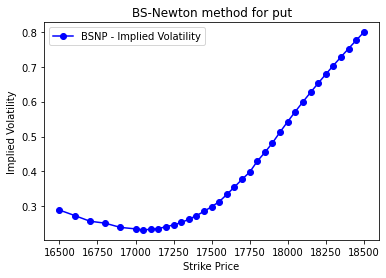

In [7]:
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Put"]
market_data
strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i,1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i,4])  # 取結算價 => market price
    

def option_price(volatility, S, K, T, r, option_type='put'):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    d2 = d1 - volatility * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price


def price_difference(volatility, market_price, S, K, T, r, option_type='put'):
    model_price = option_price(volatility, S, K, T, r, option_type)
    difference = model_price - market_price
    return difference

# 牛頓法求解隱含波動度
def implied_volatility(market_price, S, K, T, r, option_type='put', tol=1e-6, max_iter=100):
    
    # 初始起始值v0
    volatility = np.sqrt(abs(np.log(S / (K * np.exp(-r * T)))) * 2 / T)

    # 牛頓法迭代
    for i in range(max_iter):
        difference = price_difference(volatility, market_price, S, K, T, r, option_type)
        vega = option_vega(volatility, S, K, T, r)
        
        # 牛頓法疊代 vn+1 = vn- ( f(vn)-w ) / f'(vn)
        volatility = volatility - difference / vega
        
        # 收斂條件
        if abs(difference) < tol:
            break

    return volatility

# 函數計算選擇權的vega => f'(v)
def option_vega(volatility, S, K, T, r):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return vega

# 測試
underlying_price = 17900  # 基礎資產價格
time_to_maturity = 3/252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
implied_results_BSNP = []

for i in range(36):
    implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
    implied_results_BSNP.append(implied_vol)
for i in range(36):
    print(strike_price[i],"implied vol = ",implied_results_BSNP[i])
    

plt.plot(strike_price, implied_results_BSNP, marker='o', linestyle='-', color='b', label='BSNP - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BS-Newton method for put')
plt.legend()
plt.show()



In [8]:
def calculate_implied_volatility_EP():
    implied_results_BSNP = []
    for i in range(36):
        implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
        implied_results_BSNP.append(implied_vol)
    return implied_results_BSNP

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_EP, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 0.06388059999997608 seconds


### Black - Scholes model with Bisection method : European option - call

16500.0 implied vol =  0.22802831234037876
16600.0 implied vol =  0.2674209960773587
16700.0 implied vol =  0.24228942760452626
16800.0 implied vol =  0.21699831191822888
16900.0 implied vol =  0.19148625436052674
17000.0 implied vol =  0.16566854466870423
17050.0 implied vol =  0.15260867987945675
17100.0 implied vol =  0.1567084154374897
17150.0 implied vol =  0.15236893480084837
17200.0 implied vol =  0.14557532580383123
17250.0 implied vol =  0.1413772813845426
17300.0 implied vol =  0.14001416888274257
17350.0 implied vol =  0.13800647480878975
17400.0 implied vol =  0.13041464594099678
17450.0 implied vol =  0.1276237029219046
17500.0 implied vol =  0.1253352958513424
17550.0 implied vol =  0.12432117682974785
17600.0 implied vol =  0.12169256661552937
17650.0 implied vol =  0.12086890612635759
17700.0 implied vol =  0.11860167289990932
17750.0 implied vol =  0.11801527241431178
17800.0 implied vol =  0.11520935009606181
17850.0 implied vol =  0.1146943748164922
17900.0 implied v

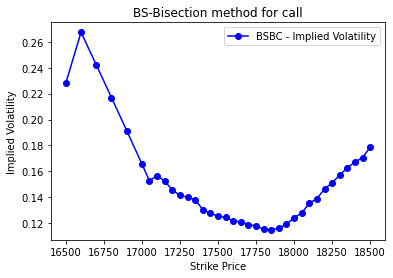

In [37]:
# 原始資料讀取及選擇call選擇權
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Call"]

# 取得履約價和結算價
strike_price = market_data["履約價"].values
market_price = market_data["結算價"].values

def option_price(volatility, S, K, T, r, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    d2 = d1 - volatility * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

def price_difference(volatility, market_price, S, K, T, r, option_type='call'):
    model_price = option_price(volatility, S, K, T, r, option_type)
    difference = model_price - market_price
    return difference

# 二分逼近法計算隱含波動度
def implied_volatility_bisection(market_price, S, K, T, r, option_type='call', tol=1e-6, max_iter=100):
    low_volatility = 0.001  # 初始下限
    high_volatility = 1.0  # 初始上限

    for i in range(max_iter):
        low_price = option_price(low_volatility, S, K, T, r, option_type)
        high_price = option_price(high_volatility, S, K, T, r, option_type)

        mid_volatility = (low_volatility + high_volatility) / 2
        mid_price = option_price(mid_volatility, S, K, T, r, option_type)

        difference_low = low_price - market_price
        difference_high = high_price - market_price
        difference_mid = mid_price - market_price

        # 判斷二分逼近的方向
        if difference_low * difference_mid < 0:
            high_volatility = mid_volatility
        elif difference_high * difference_mid < 0:
            low_volatility = mid_volatility
        else:
            break

        # 收斂條件
        if abs((high_price-low_price)/2) < tol:
            break

    return mid_volatility

# 測試
underlying_price = 17519.14  # 基礎資產價格
time_to_maturity = 3/252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
implied_results_BS_bisection_call = []

for i in range(36):
    implied_vol = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
    implied_results_BS_bisection_call.append(implied_vol)
    
for i in range(36):
    print(strike_price[i],"implied vol = ",implied_results_BS_bisection_call[i])


plt.plot(strike_price, implied_results_BS_bisection_call, marker='o', linestyle='-', color='b', label='BSBC - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BS-Bisection method for call')
plt.legend()
plt.show()


In [38]:
def calculate_implied_volatility_bisection_EC():
    implied_results_bisection_BS_call = []
    for i in range(36):
        implied_vol = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
        implied_results_bisection_BS_call.append(implied_vol)
    return implied_results_bisection_BS_call

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_bisection_EC, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 0.5373692999999093 seconds


### Black - Scholes model with Bisection method : European option - put

16500.0 implied vol =  0.2894360255300998
16600.0 implied vol =  0.27379937890172007
16700.0 implied vol =  0.25748482687771324
16800.0 implied vol =  0.25188119201362125
16900.0 implied vol =  0.2397941740900278
17000.0 implied vol =  0.2354857852682471
17050.0 implied vol =  0.2325318004861474
17100.0 implied vol =  0.23433185077086088
17150.0 implied vol =  0.23629046577587726
17200.0 implied vol =  0.24168287949636574
17250.0 implied vol =  0.24676923357136551
17300.0 implied vol =  0.2537887378428131
17350.0 implied vol =  0.26270429761148983
17400.0 implied vol =  0.27353167370520537
17450.0 implied vol =  0.28548448362108314
17500.0 implied vol =  0.2990941277658567
17550.0 implied vol =  0.3133355317609384
17600.0 implied vol =  0.3341437395559624
17650.0 implied vol =  0.35534657280053933
17700.0 implied vol =  0.3773759172530845
17750.0 implied vol =  0.397963985173963
17800.0 implied vol =  0.42924177780281747
17850.0 implied vol =  0.45449294621031733
17900.0 implied vol = 

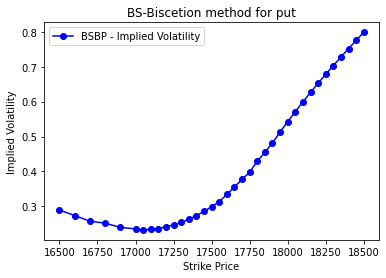

In [17]:
# 原始資料讀取及選擇call選擇權
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Put"]

# 取得履約價和結算價
strike_price = market_data["履約價"].values
market_price = market_data["結算價"].values

def option_price(volatility, S, K, T, r, option_type='put'):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    d2 = d1 - volatility * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

def price_difference(volatility, market_price, S, K, T, r, option_type='put'):
    model_price = option_price(volatility, S, K, T, r, option_type)
    difference = model_price - market_price
    return difference

# 二分逼近法計算隱含波動度
def implied_volatility_bisection(market_price, S, K, T, r, option_type='put', tol=1e-6, max_iter=100):
    low_volatility = 0.001  # 初始下限
    high_volatility = 1.0  # 初始上限

    for i in range(max_iter):
        low_price = option_price(low_volatility, S, K, T, r, option_type)
        high_price = option_price(high_volatility, S, K, T, r, option_type)

        mid_volatility = (low_volatility + high_volatility) / 2
        mid_price = option_price(mid_volatility, S, K, T, r, option_type)

        difference_low = low_price - market_price
        difference_high = high_price - market_price
        difference_mid = mid_price - market_price

        # 判斷二分逼近的方向
        if difference_low * difference_mid < 0:
            high_volatility = mid_volatility
        elif difference_high * difference_mid < 0:
            low_volatility = mid_volatility
        else:
            break

        # 收斂條件
        if abs((high_price-low_price)/2) < tol:
            break

    return mid_volatility

# 測試
underlying_price = 17900  # 基礎資產價格
time_to_maturity = 3/252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
implied_results_bisection_BS_put = []

for i in range(36):
    implied_vol = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
    implied_results_bisection_BS_put.append(implied_vol)
for i in range(36):
    print(strike_price[i],"implied vol = ",implied_results_bisection_BS_put[i])
    

plt.plot(strike_price, implied_results_bisection_BS_put, marker='o', linestyle='-', color='b', label='BSBP - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BS-Biscetion method for put')
plt.legend()
plt.show()


In [18]:
def calculate_implied_volatility_bisection_EP():
    implied_results_bisection_BS_put = []
    for i in range(36):
        implied_vol = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
        implied_results_bisection_BS_put.append(implied_vol)
    return implied_results_bisection_BS_put

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_bisection_EP, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 0.563331000000062 seconds


### Binomial tree model with Newton's method : European Call Option¶

16500.0 implied vol = 0.22952705622654365 Binomial Tree Price = 1029.9999998955234
16600.0 implied vol = 0.2679972913680378 Binomial Tree Price = 935.0000000532775
16700.0 implied vol = 0.24350459924588597 Binomial Tree Price = 834.9999999278597
16800.0 implied vol = 0.21744292655482028 Binomial Tree Price = 734.999999952149
16900.0 implied vol = 0.19149080391677745 Binomial Tree Price = 634.9999999961933
17000.0 implied vol = 0.16576538823754092 Binomial Tree Price = 535.0000000143073
17050.0 implied vol = 0.1529983735378566 Binomial Tree Price = 485.00000007830886
17100.0 implied vol = 0.15719163559527227 Binomial Tree Price = 439.0000000818273
17150.0 implied vol = 0.15222145489708752 Binomial Tree Price = 392.0000000037616
17200.0 implied vol = 0.14558138582093894 Binomial Tree Price = 345.0000000071412
17250.0 implied vol = 0.14183775149342412 Binomial Tree Price = 299.9999999902729
17300.0 implied vol = 0.14016320001645233 Binomial Tree Price = 258.00000004822414
17350.0 implied 

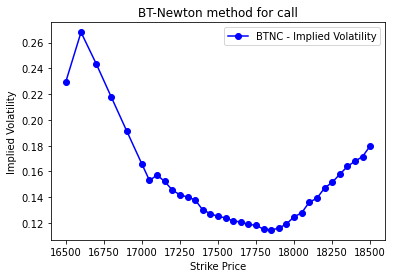

In [65]:
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Call"]

strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i, 1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i, 4])  # 取結算價 => market price


def call(S, K):
    return max(S - K, 0)


def put(S, K):
    return max(K - S, 0)

def binomial_tree_option_price(S, K, T, r, sigma, N, option_type='call', Astyle=None):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(r * dt) - d) / (u - d)

    stock_path = np.zeros((N + 1, N + 1))
    stock_path[0, 0] = S
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_path[i, j] = S * u**(i - j) * d**j

    option_value = np.zeros((N + 1, N + 1))

    # 計算選擇權價值
    for j in range(N + 1):
        option_value[N, j] = max(call(stock_path[N, j], K) if option_type == 'call' else put(stock_path[N, j], K), 0)

    # 倒推計算選擇權價值
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[i, j] = np.exp(-r * dt) * (q * option_value[i + 1, j] + (1 - q) * option_value[i + 1, j + 1])
            if Astyle and option_type == 'call':
                option_value[i, j] = max(option_value[i, j], call(stock_path[i, j], K))
            elif Astyle and option_type == 'put':
                option_value[i, j] = max(option_value[i, j], put(stock_path[i, j], K))

    return option_value[0, 0]


def option_price(volatility, S, K, T, r, option_type='call', N=100, Astyle=None):
    return binomial_tree_option_price(S, K, T, r, volatility, N, option_type, Astyle)


def price_difference(volatility, market_price, S, K, T, r, option_type='call'):
    model_price = option_price(volatility, S, K, T, r, option_type)
    difference = model_price - market_price
    return difference


# 牛頓法求解隱含波動度
def implied_volatility(market_price, S, K, T, r, option_type='call', tol=1e-6, max_iter=100):
    # 初始起始值v0
    volatility = np.sqrt(abs(np.log(S / (K * np.exp(-r * T)))) * 2 / T)

    # 牛頓法迭代
    for i in range(max_iter):
        difference = price_difference(volatility, market_price, S, K, T, r, option_type)
        vega = option_vega(volatility, S, K, T, r)

        # 牛頓法疊代 vn+1 = vn- ( f(vn)-w ) / f'(vn)
        volatility = volatility - difference / vega

        # 收斂條件
        if abs(difference) < tol:
            break

    return volatility


# 函數計算選擇權的vega => f'(v)
def option_vega(volatility, S, K, T, r):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return vega


# 測試
underlying_price = 17519.14  # 基礎資產價格
time_to_maturity = 3/252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
N = 100  # 二叉樹的步數
implied_results_BTNC = []

for i in range(36):
    implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
    binomial_tree_price = option_price(implied_vol, underlying_price, strike_price[i], time_to_maturity, risk_free_rate, N=N)
    implied_results_BTNC.append(implied_vol)
    print(strike_price[i], "implied vol =", implied_results_BTNC[i], "Binomial Tree Price =", binomial_tree_price)


plt.plot(strike_price, implied_results_BTNC, marker='o', linestyle='-', color='b', label='BTNC - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BT-Newton method for call')
plt.legend()
plt.show()


In [40]:
def calculate_implied_volatility_newton_EC():
    implied_results_BTNC = []
    for i in range(36):
        implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
        binomial_tree_price = option_price(implied_vol, underlying_price, strike_price[i], time_to_maturity, risk_free_rate, N=N)
        implied_results_BTNC.append(implied_vol)

    return implied_results_BTNC

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_newton_EC, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 6.250295699999924 seconds


### Binomial tree model with Newton's method : European Put Option

16500.0 implied vol = 0.29085021425120344 Binomial Tree Price = 0.7999999412382349
16600.0 implied vol = 0.2745616319025142 Binomial Tree Price = 0.8999999963732659
16700.0 implied vol = 0.2584045011709509 Binomial Tree Price = 1.00000001942133
16800.0 implied vol = 0.2523536915752911 Binomial Tree Price = 1.6000000005681183
16900.0 implied vol = 0.24100249492753498 Binomial Tree Price = 2.1000000774658134
17000.0 implied vol = 0.23677906327133064 Binomial Tree Price = 3.499999929437538
17050.0 implied vol = 0.23265746943683563 Binomial Tree Price = 4.400000003725779
17100.0 implied vol = 0.23511537296919338 Binomial Tree Price = 6.200000035163179
17150.0 implied vol = 0.23647368090982437 Binomial Tree Price = 8.600000034050927
17200.0 implied vol = 0.24153401268289745 Binomial Tree Price = 12.50000000399775
17250.0 implied vol = 0.2471248883958968 Binomial Tree Price = 17.499999935562368
17300.0 implied vol = 0.2541308816027088 Binomial Tree Price = 24.500000054769462
17350.0 implied 

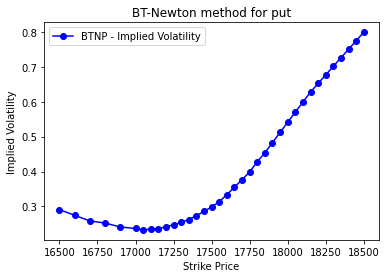

In [23]:
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Put"]

strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i, 1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i, 4])  # 取結算價 => market price


def call(S, K):
    return max(S - K, 0)


def put(S, K):
    return max(K - S, 0)


def binomial_tree_option_price(S, K, T, r, sigma, N, option_type='put', Astyle=None):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(r * dt) - d) / (u - d)

    stock_path = np.zeros((N + 1, N + 1))
    stock_path[0, 0] = S
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_path[i, j] = S * u**(i - j) * d**j

    option_value = np.zeros((N + 1, N + 1))

    # 計算選擇權價值
    for j in range(N + 1):
        option_value[N, j] = max(put(stock_path[N, j], K) if option_type == 'put' else call(stock_path[N, j], K), 0)

    # 倒推計算選擇權價值
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[i, j] = np.exp(-r * dt) * (q * option_value[i + 1, j] + (1 - q) * option_value[i + 1, j + 1])
            if Astyle and option_type == 'call':
                option_value[i, j] = max(option_value[i, j], call(stock_path[i, j], K))
            elif Astyle and option_type == 'put':
                option_value[i, j] = max(option_value[i, j], put(stock_path[i, j], K))

    return option_value[0, 0]


def option_price(volatility, S, K, T, r, option_type='put', N=100, Astyle=None):
    return binomial_tree_option_price(S, K, T, r, volatility, N, option_type, Astyle)


def price_difference(volatility, market_price, S, K, T, r, option_type='put'):
    model_price = option_price(volatility, S, K, T, r, option_type)
    difference = model_price - market_price
    return difference


# 牛頓法求解隱含波動度
def implied_volatility(market_price, S, K, T, r, option_type='put', tol=1e-6, max_iter=100):
    # 初始起始值v0
    volatility = np.sqrt(abs(np.log(S / (K * np.exp(-r * T)))) * 2 / T)

    # 牛頓法迭代
    for i in range(max_iter):
        difference = price_difference(volatility, market_price, S, K, T, r, option_type)
        vega = option_vega(volatility, S, K, T, r)

        # 牛頓法疊代 vn+1 = vn- ( f(vn)-w ) / f'(vn)
        volatility = volatility - difference / vega

        # 收斂條件
        if abs(difference) < tol:
            break

    return volatility


# 函數計算選擇權的vega => f'(v)
def option_vega(volatility, S, K, T, r):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return vega


# 測試
underlying_price = 17900  # 基礎資產價格
time_to_maturity = 3/252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
N = 100  # 二叉樹的步數
implied_results_BTNP = []

for i in range(36):
    implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
    binomial_tree_price = option_price(implied_vol, underlying_price, strike_price[i], time_to_maturity, risk_free_rate, N=N)
    implied_results_BTNP.append(implied_vol)
    print(strike_price[i], "implied vol =", implied_results_BTNP[i], "Binomial Tree Price =", binomial_tree_price)


plt.plot(strike_price, implied_results_BTNP, marker='o', linestyle='-', color='b', label='BTNP - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BT-Newton method for put')
plt.legend()
plt.show()


In [24]:
def calculate_implied_volatility_newton_EP():
    implied_results_BTNP = []
    for i in range(36):
        implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate)
        binomial_tree_price = option_price(implied_vol, underlying_price, strike_price[i], time_to_maturity, risk_free_rate, N=N)
        implied_results_BTNP.append(implied_vol)

    return implied_results_BTNP

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_newton_EP, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 4.757896900000105 seconds


### Binomial tree model with Bisection method : European Call Option

16500.0 Implied Volatility (Bisection) = 0.22952705837769383 Binomial Tree Price (Bisection) = 1030.0000000000007
16600.0 Implied Volatility (Bisection) = 0.26799729091086466 Binomial Tree Price (Bisection) = 934.9999999999993
16700.0 Implied Volatility (Bisection) = 0.24350459986486173 Binomial Tree Price (Bisection) = 835.0000000000001
16800.0 Implied Volatility (Bisection) = 0.21744292684041694 Binomial Tree Price (Bisection) = 735.000000000002
16900.0 Implied Volatility (Bisection) = 0.19149080393955664 Binomial Tree Price (Bisection) = 635.0000000000039
17000.0 Implied Volatility (Bisection) = 0.16576538815173564 Binomial Tree Price (Bisection) = 535.0000000000007
17050.0 Implied Volatility (Bisection) = 0.15299837306739178 Binomial Tree Price (Bisection) = 485.0000000000028
17100.0 Implied Volatility (Bisection) = 0.1571916352430095 Binomial Tree Price (Bisection) = 439.0000000000053
17150.0 Implied Volatility (Bisection) = 0.15222145488493682 Binomial Tree Price (Bisection) = 39

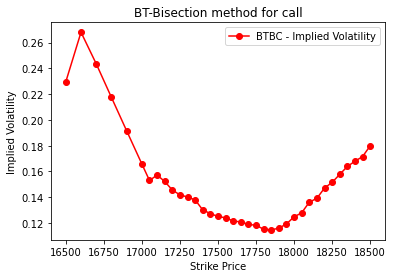

In [41]:
# 讀取市場數據
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Call"]

strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i, 1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i, 4])  # 取結算價 => market price


def call(S, K):
    return max(S - K, 0)


def put(S, K):
    return max(K - S, 0)


def binomial_tree_option_price(S, K, T, r, sigma, N, option_type='call', Astyle=None):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(r * dt) - d) / (u - d)

    stock_path = np.zeros((N + 1, N + 1))
    stock_path[0, 0] = S
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_path[i, j] = S * u**(i - j) * d**j

    option_value = np.zeros((N + 1, N + 1))

    # 計算選擇權價值
    for j in range(N + 1):
        option_value[N, j] = max(call(stock_path[N, j], K) if option_type == 'call' else put(stock_path[N, j], K), 0)

    # 倒推計算選擇權價值
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[i, j] = np.exp(-r * dt) * (q * option_value[i + 1, j] + (1 - q) * option_value[i + 1, j + 1])
            if Astyle and option_type == 'call':
                option_value[i, j] = max(option_value[i, j], call(stock_path[i, j], K))
            elif Astyle and option_type == 'put':
                option_value[i, j] = max(option_value[i, j], put(stock_path[i, j], K))

    return option_value[0, 0]


def option_price(volatility, S, K, T, r, option_type='call', N=100, Astyle=None):
    return binomial_tree_option_price(S, K, T, r, volatility, N, option_type, Astyle)


# 二分逼近法求解隱含波動度
def implied_volatility_bisection(market_price, S, K, T, r, option_type='call', tol=1e-6, max_iter=100):
    # 初始上下界估計值
    lower_volatility = 0.001
    upper_volatility = 1.0  # 這裡設定一個合理的上界值

    # 兩個邊界的初始價格
    lower_price = option_price(lower_volatility, S, K, T, r, option_type)
    upper_price = option_price(upper_volatility, S, K, T, r, option_type)

    # 牛頓法迭代
    for i in range(max_iter):
        mid_volatility = (lower_volatility + upper_volatility) / 2
        mid_price = option_price(mid_volatility, S, K, T, r, option_type)

        # 更新邊界
        if mid_price > market_price:
            upper_volatility = mid_volatility
        else:
            lower_volatility = mid_volatility

        # 收斂條件
        if abs( (upper_price - lower_price)/2 ) < tol:
            break

    return mid_volatility


# 測試
underlying_price = 17519.14  # 基礎資產價格
time_to_maturity = 3 / 252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
N = 100  # 二叉樹的步數
implied_results_bisection_Bin_call = []

for i in range(36):
    implied_vol_bisection = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i],
                                                          time_to_maturity, risk_free_rate)
    binomial_tree_price_bisection = option_price(implied_vol_bisection, underlying_price, strike_price[i],
                                                 time_to_maturity, risk_free_rate, N=N)
    implied_results_bisection_Bin_call.append(implied_vol_bisection)
    print(strike_price[i], "Implied Volatility (Bisection) =", implied_results_bisection_Bin_call[i],
          "Binomial Tree Price (Bisection) =", binomial_tree_price_bisection)

plt.plot(strike_price, implied_results_bisection_Bin_call, marker='o', linestyle='-', color='r', label='BTBC - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BT-Bisection method for call')
plt.legend()
plt.show()


In [42]:
def calculate_implied_volatility_bisection_EC():
    implied_results_bisection_BT_call = []
    for i in range(36):
        implied_vol_bisection = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i],time_to_maturity, risk_free_rate)
        binomial_tree_price_bisection = option_price(implied_vol_bisection, underlying_price, strike_price[i], time_to_maturity, risk_free_rate, N=N)
        implied_results_bisection_Bin_call.append(implied_vol_bisection)

    return implied_results_bisection_BT_call

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_bisection_EC, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 54.979172399999925 seconds


### Binomial tree model with Bisection method : European Put Option

16500.0 Implied Volatility (Bisection) = 0.2908502161870167 Binomial Tree Price (Bisection) = 0.8000000000005558
16600.0 Implied Volatility (Bisection) = 0.2745616320218439 Binomial Tree Price (Bisection) = 0.8999999999994145
16700.0 Implied Volatility (Bisection) = 0.25840450053255015 Binomial Tree Price (Bisection) = 1.000000000000547
16800.0 Implied Volatility (Bisection) = 0.2523536915638892 Binomial Tree Price (Bisection) = 1.5999999999990582
16900.0 Implied Volatility (Bisection) = 0.2410024939380465 Binomial Tree Price (Bisection) = 2.100000000000856
17000.0 Implied Volatility (Bisection) = 0.23677906386836134 Binomial Tree Price (Bisection) = 3.5000000000015947
17050.0 Implied Volatility (Bisection) = 0.2326574694053784 Binomial Tree Price (Bisection) = 4.400000000000256
17100.0 Implied Volatility (Bisection) = 0.2351153727639972 Binomial Tree Price (Bisection) = 6.200000000001721
17150.0 Implied Volatility (Bisection) = 0.23647368071203245 Binomial Tree Price (Bisection) = 8.5

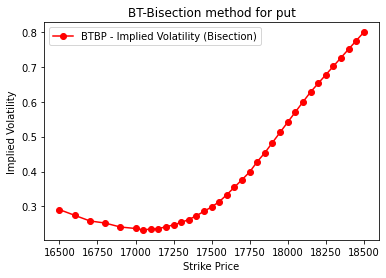

In [28]:
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Put"]

strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i, 1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i, 4])  # 取結算價 => market price


def call(S, K):
    return max(S - K, 0)


def put(S, K):
    return max(K - S, 0)


def binomial_tree_option_price(S, K, T, r, sigma, N, option_type='put', Astyle=None):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(r * dt) - d) / (u - d)

    stock_path = np.zeros((N + 1, N + 1))
    stock_path[0, 0] = S
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_path[i, j] = S * u**(i - j) * d**j

    option_value = np.zeros((N + 1, N + 1))

    # 計算選擇權價值
    for j in range(N + 1):
        option_value[N, j] = max(put(stock_path[N, j], K) if option_type == 'put' else call(stock_path[N, j], K), 0)

    # 倒推計算選擇權價值
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[i, j] = np.exp(-r * dt) * (q * option_value[i + 1, j] + (1 - q) * option_value[i + 1, j + 1])
            if Astyle and option_type == 'call':
                option_value[i, j] = max(option_value[i, j], call(stock_path[i, j], K))
            elif Astyle and option_type == 'put':
                option_value[i, j] = max(option_value[i, j], put(stock_path[i, j], K))

    return option_value[0, 0]


def option_price(volatility, S, K, T, r, option_type='put', N=100, Astyle=None):
    return binomial_tree_option_price(S, K, T, r, volatility, N, option_type, Astyle)


# 二分逼近法求解隱含波動度
def implied_volatility_bisection(market_price, S, K, T, r, option_type='put', tol=1e-6, max_iter=100):
    # 初始上下界估計值
    lower_volatility = 0.001
    upper_volatility = 1.0  # 這裡設定一個合理的上界值

    # 兩個邊界的初始價格
    lower_price = option_price(lower_volatility, S, K, T, r, option_type)
    upper_price = option_price(upper_volatility, S, K, T, r, option_type)

    # 牛頓法迭代
    for i in range(max_iter):
        mid_volatility = (lower_volatility + upper_volatility) / 2
        mid_price = option_price(mid_volatility, S, K, T, r, option_type)

        # 更新邊界
        if mid_price > market_price:
            upper_volatility = mid_volatility
        else:
            lower_volatility = mid_volatility

        # 收斂條件
        if abs( (upper_price - lower_price)/2 ) < tol:
            break

    return mid_volatility


# 測試
underlying_price = 17900  # 基礎資產價格
time_to_maturity = 3 / 252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
N = 100  # 二叉樹的步數
implied_results_bisection_BT_put = []

for i in range(36):
    implied_vol_bisection = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i],
                                                          time_to_maturity, risk_free_rate)
    binomial_tree_price_bisection = option_price(implied_vol_bisection, underlying_price, strike_price[i],
                                                 time_to_maturity, risk_free_rate, N=N)
    implied_results_bisection_BT_put.append(implied_vol_bisection)
    print(strike_price[i], "Implied Volatility (Bisection) =", implied_results_bisection_BT_put[i],
          "Binomial Tree Price (Bisection) =", binomial_tree_price_bisection)


plt.plot(strike_price, implied_results_bisection_BT_put, marker='o', linestyle='-', color='r', label='BTBP - Implied Volatility (Bisection)')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BT-Bisection method for put')
plt.legend()
plt.show()


In [30]:
def calculate_implied_volatility_bisection_EP():
    implied_results_bisection_BT_put = []
    for i in range(36):
        implied_vol_bisection = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i],
                                                             time_to_maturity, risk_free_rate)
        implied_results_bisection_BT_put.append(implied_vol_bisection)

    return implied_results_bisection_BT_put

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_bisection_EP, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 51.88654580000002 seconds


### 比較: 歐式 put 的微笑曲線

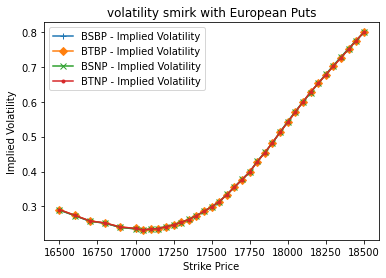

In [33]:
plt.plot(strike_price, implied_results_bisection_BS_put, marker='+', linestyle='-',  label='BSBP - Implied Volatility')
plt.plot(strike_price, implied_results_bisection_BT_put, marker='D', linestyle='-',  label='BTBP - Implied Volatility')
plt.plot(strike_price, implied_results_BSNP, marker='x', linestyle='-',  label='BSNP - Implied Volatility')
plt.plot(strike_price, implied_results_BTNP, marker='.', linestyle='-', label='BTNP - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('volatility smirk with European Puts')
plt.legend()
plt.show()

## (2) 美式選擇權

### Binomial tree model with Newton's method : American Call Option

16500.0 implied vol = 0.2619891712960811 Binomial Tree Price = 1030.0000000012667
16600.0 implied vol = 0.2812494202414318 Binomial Tree Price = 934.999999984759
16700.0 implied vol = 0.25493220235018965 Binomial Tree Price = 834.9999999955087
16800.0 implied vol = 0.2288063952326176 Binomial Tree Price = 735.0000000369288
16900.0 implied vol = 0.2028825501681095 Binomial Tree Price = 635.0000001075697
17000.0 implied vol = 0.17583600553599446 Binomial Tree Price = 534.9999999315585
17050.0 implied vol = 0.16195757670364236 Binomial Tree Price = 485.00000004038606
17100.0 implied vol = 0.16356275676845597 Binomial Tree Price = 438.99999999177277
17150.0 implied vol = 0.15812366311309395 Binomial Tree Price = 392.0000000364136
17200.0 implied vol = 0.15010318243259152 Binomial Tree Price = 344.99999999826827
17250.0 implied vol = 0.1454014154212429 Binomial Tree Price = 299.9999999819942
17300.0 implied vol = 0.14351242602243372 Binomial Tree Price = 258.0000000380926
17350.0 implied vo

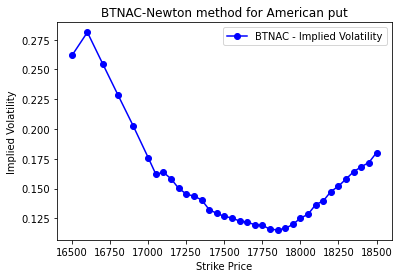

In [45]:
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Call"]

strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i, 1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i, 4])  # 取結算價 => market price


def call(S, K):
    return max(S - K, 0)


def put(S, K):
    return max(K - S, 0)

def binomial_tree_option_price(S, K, T, r, b, sigma, N, option_type='call', Astyle=None):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(b * dt) - d) / (u - d)

    stock_path = np.zeros((N + 1, N + 1))
    stock_path[0, 0] = S
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_path[i, j] = S * u**(i - j) * d**j

    option_value = np.zeros((N + 1, N + 1))

    # 計算選擇權價值
    for j in range(N + 1):
        option_value[N, j] = max(call(stock_path[N, j], K) if option_type == 'call' else put(stock_path[N, j], K), 0)

    # 倒推計算選擇權價值
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[i, j] = np.exp(-b * dt) * (q * option_value[i + 1, j] + (1 - q) * option_value[i + 1, j + 1])
            if Astyle and option_type == 'call':
                option_value[i, j] = max(option_value[i, j], call(stock_path[i, j], K))
            elif Astyle and option_type == 'put':
                option_value[i, j] = max(option_value[i, j], put(stock_path[i, j], K))

    return option_value[0, 0]


def option_price(volatility, S, K, T, r, b, option_type='call', N=100, Astyle=None):
    return binomial_tree_option_price(S, K, T, r, b, volatility, N, option_type, Astyle)


def price_difference(volatility, market_price, S, K, T, r, b, option_type='call'):
    model_price = option_price(volatility, S, K, T, r, b, option_type)
    difference = model_price - market_price
    return difference


# 牛頓法求解隱含波動度
def implied_volatility(market_price, S, K, T, r, b, option_type='call', tol=1e-6, max_iter=100):
    # 初始起始值v0
    volatility = np.sqrt(abs(np.log(S / (K * np.exp(-b * T)))) * 2 / T)

    # 牛頓法迭代
    for i in range(max_iter):
        difference = price_difference(volatility, market_price, S, K, T, r, b, option_type)
        vega = option_vega(volatility, S, K, T, r, b)

        # 牛頓法疊代 vn+1 = vn- ( f(vn)-w ) / f'(vn)
        volatility = volatility - difference / vega

        # 收斂條件
        if abs(difference) < tol:
            break

    return volatility


# 函數計算選擇權的vega => f'(v)
def option_vega(volatility, S, K, T, r, b):
    d1 = (np.log(S / K) + (b + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return vega


# 測試
underlying_price = 17519.14  # 基礎資產價格
time_to_maturity = 3/252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
dividend_paying = 0.01
b = risk_free_rate - dividend_paying
N = 100  # 二叉樹的步數
implied_results_BTNAC = []

for i in range(36):
    implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate, b)
    binomial_tree_price = option_price(implied_vol, underlying_price, strike_price[i], time_to_maturity, risk_free_rate, b, N=N)
    implied_results_BTNAC.append(implied_vol)
    print(strike_price[i], "implied vol =", implied_results_BTNAC[i], "Binomial Tree Price =", binomial_tree_price)


plt.plot(strike_price, implied_results_BTNAC, marker='o', linestyle='-', color='b', label='BTNAC - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BTNAC-Newton method for American put')
plt.legend()
plt.show()


In [47]:
def calculate_implied_volatility_newton_AC():
    implied_results_BTNAC = []
    for i in range(36):
        implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate, b)
        implied_results_BTNAC.append(implied_vol)

    return implied_results_BTNAC

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_newton_AC, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 4.744320799999969 seconds


### Binomial tree model with Newton's method : American Put Option

16500.0 implied vol = 0.2905378594083925 Binomial Tree Price = 0.7999999154110531
16600.0 implied vol = 0.2741958052487877 Binomial Tree Price = 0.8999999844368599
16700.0 implied vol = 0.25797868908402627 Binomial Tree Price = 1.0000000130299356
16800.0 implied vol = 0.25194731602792203 Binomial Tree Price = 1.6000000027040073
16900.0 implied vol = 0.24065636896726492 Binomial Tree Price = 2.1000000933834997
17000.0 implied vol = 0.23641048154266817 Binomial Tree Price = 3.4999999418095284
17050.0 implied vol = 0.23220179529715326 Binomial Tree Price = 4.400000009161869
17100.0 implied vol = 0.23469184947322705 Binomial Tree Price = 6.200000045972345
17150.0 implied vol = 0.23591624728303273 Binomial Tree Price = 8.60000002279728
17200.0 implied vol = 0.2409902587182997 Binomial Tree Price = 12.500000008749774
17250.0 implied vol = 0.2465908904749191 Binomial Tree Price = 17.499999915537895
17300.0 implied vol = 0.25344217344714 Binomial Tree Price = 24.500000050598622
17350.0 implied

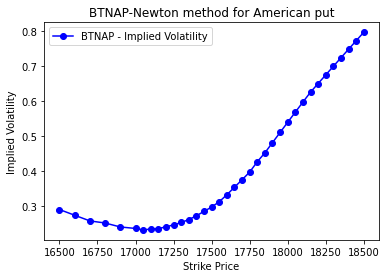

In [49]:
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Put"]

strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i, 1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i, 4])  # 取結算價 => market price


def call(S, K):
    return max(S - K, 0)


def put(S, K):
    return max(K - S, 0)

def binomial_tree_option_price(S, K, T, r, b, sigma, N, option_type='put', Astyle=None):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(b * dt) - d) / (u - d)

    stock_path = np.zeros((N + 1, N + 1))
    stock_path[0, 0] = S
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_path[i, j] = S * u**(i - j) * d**j

    option_value = np.zeros((N + 1, N + 1))

    # 計算選擇權價值
    for j in range(N + 1):
        option_value[N, j] = max(put(stock_path[N, j], K) if option_type == 'put' else call(stock_path[N, j], K), 0)

    # 倒推計算選擇權價值
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[i, j] = np.exp(-b * dt) * (q * option_value[i + 1, j] + (1 - q) * option_value[i + 1, j + 1])
            if Astyle and option_type == 'call':
                option_value[i, j] = max(option_value[i, j], call(stock_path[i, j], K))
            elif Astyle and option_type == 'put':
                option_value[i, j] = max(option_value[i, j], put(stock_path[i, j], K))

    return option_value[0, 0]


def option_price(volatility, S, K, T, r, b, option_type='put', N=100, Astyle=None):
    return binomial_tree_option_price(S, K, T, r, b, volatility, N, option_type, Astyle)


def price_difference(volatility, market_price, S, K, T, r, b, option_type='put'):
    model_price = option_price(volatility, S, K, T, r, b, option_type)
    difference = model_price - market_price
    return difference


# 牛頓法求解隱含波動度
def implied_volatility(market_price, S, K, T, r, b, option_type='put', tol=1e-6, max_iter=100):
    # 初始起始值v0
    volatility = np.sqrt(abs(np.log(S / (K * np.exp(-b * T)))) * 2 / T)

    # 牛頓法迭代
    for i in range(max_iter):
        difference = price_difference(volatility, market_price, S, K, T, r, b, option_type)
        vega = option_vega(volatility, S, K, T, r, b)

        # 牛頓法疊代 vn+1 = vn- ( f(vn)-w ) / f'(vn)
        volatility = volatility - difference / vega

        # 收斂條件
        if abs(difference) < tol:
            break

    return volatility


# 函數計算選擇權的vega => f'(v)
def option_vega(volatility, S, K, T, r, b):
    d1 = (np.log(S / K) + (b + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return vega


# 測試
underlying_price = 17900  # 基礎資產價格
time_to_maturity = 3/252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
dividend_paying = 0.01
b = risk_free_rate - dividend_paying
N = 100  # 二叉樹的步數
implied_results_BTNAP = []

for i in range(36):
    implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate, b)
    binomial_tree_price = option_price(implied_vol, underlying_price, strike_price[i], time_to_maturity, risk_free_rate, b, N=N)
    implied_results_BTNAP.append(implied_vol)
    print(strike_price[i], "implied vol =", implied_results_BTNAP[i], "Binomial Tree Price =", binomial_tree_price)


plt.plot(strike_price, implied_results_BTNAP, marker='o', linestyle='-', color='b', label='BTNAP - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BTNAP-Newton method for American put')
plt.legend()
plt.show()


In [50]:
def calculate_implied_volatility_newton_AP():
    implied_results_BTNAP = []
    for i in range(36):
        implied_vol = implied_volatility(market_price[i], underlying_price, strike_price[i], time_to_maturity, risk_free_rate, b)
        implied_results_BTNAP.append(implied_vol)

    return implied_results_BTNAP

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_newton_AP, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 4.122362100000146 seconds


### Binomial tree model with Bisection method : American Call Option

16500.0 Implied Volatility (Bisection) = 0.26198917127975063 Binomial Tree Price (Bisection) = 1029.9999999999993
16600.0 Implied Volatility (Bisection) = 0.28124942033138667 Binomial Tree Price (Bisection) = 934.9999999999987
16700.0 Implied Volatility (Bisection) = 0.25493220237668934 Binomial Tree Price (Bisection) = 835.0000000000023
16800.0 Implied Volatility (Bisection) = 0.2288063950149597 Binomial Tree Price (Bisection) = 734.9999999999991
16900.0 Implied Volatility (Bisection) = 0.2028825495340345 Binomial Tree Price (Bisection) = 635.000000000001
17000.0 Implied Volatility (Bisection) = 0.17583600582842857 Binomial Tree Price (Bisection) = 535.0000000000009
17050.0 Implied Volatility (Bisection) = 0.16195757653088722 Binomial Tree Price (Bisection) = 485.0000000000042
17100.0 Implied Volatility (Bisection) = 0.16356275679483423 Binomial Tree Price (Bisection) = 438.99999999999875
17150.0 Implied Volatility (Bisection) = 0.1581236629967705 Binomial Tree Price (Bisection) = 392

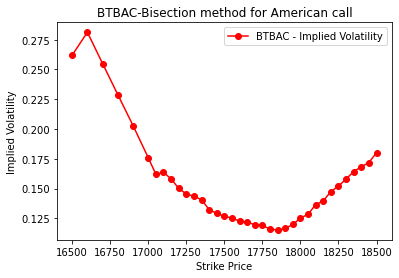

In [52]:
# 讀取市場數據
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Call"]

strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i, 1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i, 4])  # 取結算價 => market price


def call(S, K):
    return max(S - K, 0)


def put(S, K):
    return max(K - S, 0)


def binomial_tree_option_price(S, K, T, r, b, sigma, N, option_type='call', Astyle=None):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(b * dt) - d) / (u - d)

    stock_path = np.zeros((N + 1, N + 1))
    stock_path[0, 0] = S
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_path[i, j] = S * u**(i - j) * d**j

    option_value = np.zeros((N + 1, N + 1))

    # 計算選擇權價值
    for j in range(N + 1):
        option_value[N, j] = max(call(stock_path[N, j], K) if option_type == 'call' else put(stock_path[N, j], K), 0)

    # 倒推計算選擇權價值
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[i, j] = np.exp(-b * dt) * (q * option_value[i + 1, j] + (1 - q) * option_value[i + 1, j + 1])
            if Astyle and option_type == 'call':
                option_value[i, j] = max(option_value[i, j], call(stock_path[i, j], K))
            elif Astyle and option_type == 'put':
                option_value[i, j] = max(option_value[i, j], put(stock_path[i, j], K))

    return option_value[0, 0]


def option_price(volatility, S, K, T, r, b, option_type='call', N=100, Astyle=None):
    return binomial_tree_option_price(S, K, T, r, b, volatility, N, option_type, Astyle)


# 二分逼近法求解隱含波動度
def implied_volatility_bisection(market_price, S, K, T, r, b, option_type='call', tol=1e-6, max_iter=100):
    # 初始上下界估計值
    lower_volatility = 0.001
    upper_volatility = 1.0  # 這裡設定一個合理的上界值

    # 兩個邊界的初始價格
    lower_price = option_price(lower_volatility, S, K, T, r, b, option_type)
    upper_price = option_price(upper_volatility, S, K, T, r, b, option_type)

    # 牛頓法迭代
    for i in range(max_iter):
        mid_volatility = (lower_volatility + upper_volatility) / 2
        mid_price = option_price(mid_volatility, S, K, T, r, b, option_type)

        # 更新邊界
        if mid_price > market_price:
            upper_volatility = mid_volatility
        else:
            lower_volatility = mid_volatility

        # 收斂條件
        if abs( (upper_price - lower_price)/2 ) < tol:
            break

    return mid_volatility


# 測試
underlying_price = 17519.14  # 基礎資產價格
time_to_maturity = 3 / 252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
dividend_paying = 0.01
b = risk_free_rate - dividend_paying
N = 100  # 二叉樹的步數
implied_results_bisection_BT_AC = []

for i in range(36):
    implied_vol_bisection = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i],
                                                          time_to_maturity, risk_free_rate, b)
    binomial_tree_price_bisection = option_price(implied_vol_bisection, underlying_price, strike_price[i],
                                                 time_to_maturity, risk_free_rate, b, N=N)
    implied_results_bisection_BT_AC.append(implied_vol_bisection)
    print(strike_price[i], "Implied Volatility (Bisection) =", implied_results_bisection_BT_AC[i],
          "Binomial Tree Price (Bisection) =", binomial_tree_price_bisection)


plt.plot(strike_price, implied_results_bisection_BT_AC, marker='o', linestyle='-', color='r',label='BTBAC - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BTBAC-Bisection method for American call')
plt.legend()
plt.show()


In [53]:
def calculate_implied_volatility_bisection_AC():
    implied_results_bisection_BT_AC = []
    for i in range(36):
        implied_vol_bisection = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i],
                                                              time_to_maturity, risk_free_rate, b)
        implied_results_bisection_BT_AC.append(implied_vol_bisection)

    return implied_results_bisection_BT_AC

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_bisection_AC, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 53.37853240000004 seconds


### Binomial tree model with Bisection method : American Put Option

16500.0 Implied Volatility (Bisection) = 0.2905378621682204 Binomial Tree Price (Bisection) = 0.7999999999995333
16600.0 Implied Volatility (Bisection) = 0.2741958057558074 Binomial Tree Price (Bisection) = 0.8999999999997834
16700.0 Implied Volatility (Bisection) = 0.2579786886601506 Binomial Tree Price (Bisection) = 0.9999999999997399
16800.0 Implied Volatility (Bisection) = 0.251947315974248 Binomial Tree Price (Bisection) = 1.6000000000000278
16900.0 Implied Volatility (Bisection) = 0.2406563677862792 Binomial Tree Price (Bisection) = 2.099999999999787
17000.0 Implied Volatility (Bisection) = 0.23641048203048548 Binomial Tree Price (Bisection) = 3.4999999999986873
17050.0 Implied Volatility (Bisection) = 0.23220179522051443 Binomial Tree Price (Bisection) = 4.4000000000004515
17100.0 Implied Volatility (Bisection) = 0.23469184920717895 Binomial Tree Price (Bisection) = 6.2000000000006095
17150.0 Implied Volatility (Bisection) = 0.23591624715163712 Binomial Tree Price (Bisection) = 

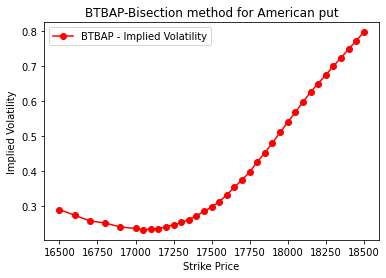

In [54]:
# 讀取市場數據
market_data = pd.read_csv('C:/Users/jack/Desktop/政大/修課/必修/選擇權-評價與應用/期末上課內容/期末程式報告/選擇權程式期末報告_洪顗傑_112352029_金融碩一/台指期行情165to185.csv')
market_data = market_data.loc[market_data["買賣權"] == "Put"]

strike_price = []
market_price = []

for i in range(36):
    strike_price.append(market_data.iat[i, 1])  # 取履約價 => strike price
for i in range(36):
    market_price.append(market_data.iat[i, 4])  # 取結算價 => market price


def call(S, K):
    return max(S - K, 0)


def put(S, K):
    return max(K - S, 0)


def binomial_tree_option_price(S, K, T, r, b, sigma, N, option_type='put', Astyle=None):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(b * dt) - d) / (u - d)

    stock_path = np.zeros((N + 1, N + 1))
    stock_path[0, 0] = S
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_path[i, j] = S * u**(i - j) * d**j

    option_value = np.zeros((N + 1, N + 1))

    # 計算選擇權價值
    for j in range(N + 1):
        option_value[N, j] = max(put(stock_path[N, j], K) if option_type == 'put' else call(stock_path[N, j], K), 0)

    # 倒推計算選擇權價值
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[i, j] = np.exp(-b * dt) * (q * option_value[i + 1, j] + (1 - q) * option_value[i + 1, j + 1])
            if Astyle and option_type == 'call':
                option_value[i, j] = max(option_value[i, j], call(stock_path[i, j], K))
            elif Astyle and option_type == 'put':
                option_value[i, j] = max(option_value[i, j], put(stock_path[i, j], K))

    return option_value[0, 0]


def option_price(volatility, S, K, T, r, b, option_type='put', N=100, Astyle=None):
    return binomial_tree_option_price(S, K, T, r, b, volatility, N, option_type, Astyle)


# 二分逼近法求解隱含波動度
def implied_volatility_bisection(market_price, S, K, T, r, b, option_type='put', tol=1e-6, max_iter=100):
    # 初始上下界估計值
    lower_volatility = 0.001
    upper_volatility = 1.0  # 這裡設定一個合理的上界值

    # 兩個邊界的初始價格
    lower_price = option_price(lower_volatility, S, K, T, r, b, option_type)
    upper_price = option_price(upper_volatility, S, K, T, r, b, option_type)

    # 牛頓法迭代
    for i in range(max_iter):
        mid_volatility = (lower_volatility + upper_volatility) / 2
        mid_price = option_price(mid_volatility, S, K, T, r, b, option_type)

        # 更新邊界
        if mid_price > market_price:
            upper_volatility = mid_volatility
        else:
            lower_volatility = mid_volatility

        # 收斂條件
        if abs( (upper_price - lower_price)/2 ) < tol:
            break

    return mid_volatility


# 測試
underlying_price = 17900  # 基礎資產價格
time_to_maturity = 3 / 252  # 到期時間（年）
risk_free_rate = 0.05  # 無風險利率
dividend_paying = 0.01
b = risk_free_rate - dividend_paying
N = 100  # 二叉樹的步數
implied_results_bisection_BT_AP = []

for i in range(36):
    implied_vol_bisection = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i],
                                                          time_to_maturity, risk_free_rate, b)
    binomial_tree_price_bisection = option_price(implied_vol_bisection, underlying_price, strike_price[i],
                                                 time_to_maturity, risk_free_rate, b, N=N)
    implied_results_bisection_BT_AP.append(implied_vol_bisection)
    print(strike_price[i], "Implied Volatility (Bisection) =", implied_results_bisection_BT_AP[i],
          "Binomial Tree Price (Bisection) =", binomial_tree_price_bisection)


plt.plot(strike_price, implied_results_bisection_BT_AP, marker='o', linestyle='-', color='r',label='BTBAP - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BTBAP-Bisection method for American put')
plt.legend()
plt.show()


In [55]:
def calculate_implied_volatility_bisection_AP():
    implied_results_bisection_BT_AP = []
    for i in range(36):
        implied_vol_bisection = implied_volatility_bisection(market_price[i], underlying_price, strike_price[i],
                                                              time_to_maturity, risk_free_rate, b)
        implied_results_bisection_BT_AP.append(implied_vol_bisection)

    return implied_results_bisection_BT_AP

# 計算測量執行時間
time_taken = timeit.timeit(calculate_implied_volatility_bisection_AP, number=1)

print(f"Time taken for 1 iterations: {time_taken} seconds")

Time taken for 1 iterations: 53.50170319999984 seconds


### 比較: 美式 call 的微笑曲線

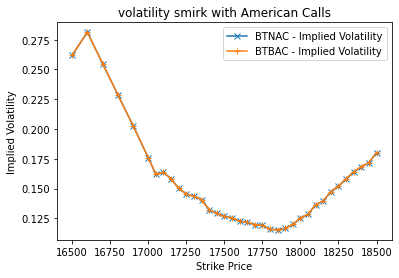

In [56]:
plt.plot(strike_price, implied_results_BTNAC, marker='x', linestyle='-',  label='BTNAC - Implied Volatility')
plt.plot(strike_price, implied_results_bisection_BT_AC, marker='+', linestyle='-', label='BTBAC - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('volatility smirk with American Calls')
plt.legend()
plt.show()

### 比較: 美式 put 的微笑曲線

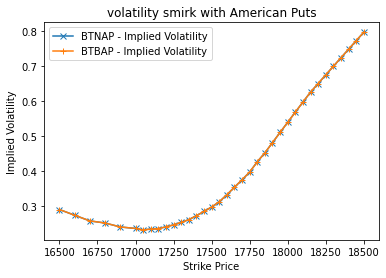

In [57]:
plt.plot(strike_price, implied_results_BTNAP, marker='x', linestyle='-', label='BTNAP - Implied Volatility')
plt.plot(strike_price, implied_results_bisection_BT_AP, marker='+', linestyle='-', label='BTBAP - Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('volatility smirk with American Puts')
plt.legend()
plt.show()

# 2. Implement the combinatorial method to price European calls and puts

In [58]:
def Combinatorial_Option_Value(S, K, T, r, b, option, n, sigma):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(b * dt) - d) / (u - d)
    option_value = 0.0

    for j in range(n + 1):
        probability = np.math.comb(n, j) * np.power(p, n - j) * np.power(1 - p, j)
        stock_price = S * np.power(u, n - j) * np.power(d, j)
        if option.lower() == "call":
            intrinsic_value = max(stock_price - K, 0)
        elif option.lower() == "put":
            intrinsic_value = max(K - stock_price, 0)
        else:
            raise ValueError("Invalid option type. Use 'call' or 'put'.")

        option_value += probability * intrinsic_value

    discount_factor = np.exp(-r * T)
    option_value *= discount_factor

    return option_value

### combinatorial method of European Calls

In [59]:
print("S = ", end = '')
S = float(input())
print("K = ", end = '')
K = float(input())
print("T = ", end = '')
T = float(input())
print("r = ", end = '')
r = float(input())
print("q = ", end = '') #考慮股利率
q = float(input())
b = r-q
print("sigma = ", end = '')
sigma = float(input())

S = 120
K = 100
T = 1
r = 0.03
q = 0.01
sigma = 0.2


In [62]:
n = 252
call_option_value = Combinatorial_Option_Value(S, K, T, r, b, "call", n, sigma)
print(f"The Call Option Value is: {call_option_value}")

The Call Option Value is: 23.506776712271733


In [63]:
time_taken = timeit.timeit(lambda: Combinatorial_Option_Value(S, K, T, r, b, "call", n, sigma), number=1)
print(f"Time taken for function calls: {time_taken} seconds")

Time taken for function calls: 0.0053115999999135965 seconds


### combinatorial method of European Puts

In [68]:
print("S = ", end = '')
S = float(input())
print("K = ", end = '')
K = float(input())
print("T = ", end = '')
T = float(input())
print("r = ", end = '')
r = float(input())
print("q = ", end = '') #考慮股利率
q = float(input())
b = r-q
print("sigma = ", end = '')
sigma = float(input())

S = 100
K = 120
T = 1
r = 0.03
q = 0.01
sigma = 0.2


In [69]:
put_option_value = Combinatorial_Option_Value(S, K, T, r, b, "put", n, sigma)
print(f"The Put Option Value is: {put_option_value}")

The Put Option Value is: 19.97045485194242


In [70]:
time_taken = timeit.timeit(lambda: Combinatorial_Option_Value(S, K, T, r, b, "put", n, sigma), number=1)
print(f"Time taken for 1 function puts: {time_taken} seconds")

Time taken for 1 function puts: 0.005127800000082061 seconds
